<a href="https://colab.research.google.com/github/pablocelva/challenge-telecom-x/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

✅ Cargamos los datos directamente desde la API utilizando Python.

✅ Convertimos los datos a un DataFrame de Pandas para facilitar su manipulación.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

✅ Exploramos las columnas del dataset y verificamos sus tipos de datos.

✅ Identificamos las columnas más relevantes para el análisis de evasión.

📌 Tips:
🔗 Documentación de DataFrame.info()
🔗 Documentación de DataFrame.dtypes

In [3]:
df.shape

(7267, 6)

In [4]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [7]:
if 'customerID' in df.columns:
 df.drop('customerID', axis=1, inplace=True)
df.head()

,Churn,customer,phone,internet,account
0,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


✅ Comprobamos incoherencias e inconsistencias en los datos, verificando si hay problemas en los datos que puedan afectar el análisis.

✅ Prestamos atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías.

📌 Tips:
🔗 Documentación de pandas.unique()
🔗 Documentación de pandas.Series.dt.normalize()

In [8]:
df['Churn'].sample(2)

,Churn
6293,Yes
878,Yes


In [9]:
df['account'].sample(2)

,account
1049,"{'Contract': 'Two year', 'PaperlessBilling': '..."
6837,"{'Contract': 'Two year', 'PaperlessBilling': '..."


In [10]:
df['account'][1261]

{'Contract': 'Two year',
 'PaperlessBilling': 'No',
 'PaymentMethod': 'Bank transfer (automatic)',
 'Charges': {'Monthly': 80.45, 'Total': '5737.6'}}

In [11]:
df['customer'].sample(2)

,customer
1973,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
588,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."


In [12]:
df['customer'][1546]

{'gender': 'Male',
 'SeniorCitizen': 0,
 'Partner': 'No',
 'Dependents': 'No',
 'tenure': 56}

In [13]:
pd.unique(df['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [14]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0, ' ': 0})

In [15]:
df['Churn'] = df['Churn'].fillna(0)

In [16]:
df['Churn'] = df['Churn'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Churn     7267 non-null   int64 
 1   customer  7267 non-null   object
 2   phone     7267 non-null   object
 3   internet  7267 non-null   object
 4   account   7267 non-null   object
dtypes: int64(1), object(4)
memory usage: 284.0+ KB


In [17]:
pd.unique(df['Churn'])

array([0, 1])

In [18]:
df['Churn'].isna().sum()

np.int64(0)

In [19]:
df['Churn'].isnull().sum()

np.int64(0)

In [20]:
pd.json_normalize(df['customer']).sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure
3290,Male,1,Yes,No,34
6034,Male,0,No,No,69


In [21]:
df = pd.concat([df.drop(['customer'], axis=1), pd.json_normalize(df['customer'])], axis=1)
df.head()

,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,1,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,1,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,1,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [22]:
pd.unique(df['tenure'])

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [23]:
pd.json_normalize(df['account']).sample(2)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6438,Month-to-month,No,Electronic check,91.25,2964.05
4717,One year,Yes,Bank transfer (automatic),106.60,7244.7


In [24]:
df = pd.concat([df.drop(['account'], axis=1), pd.json_normalize(df['account'], sep='_')], axis=1)
df.head()

,Churn,phone,internet,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.6,593.3
1,0,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,No,No,9,Month-to-month,No,Mailed check,59.9,542.4
2,1,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85
3,1,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,1237.85
4,1,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,267.4


In [25]:
pd.unique(df['Charges_Total'])

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [26]:
pd.json_normalize(df['phone']).sample(2)

,PhoneService,MultipleLines
1726,Yes,Yes
3755,Yes,No


In [27]:
df = pd.concat([df.drop(['phone'], axis=1), pd.json_normalize(df['phone'])], axis=1)
df.head()

,Churn,internet,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,PhoneService,MultipleLines
0,0,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.6,593.3,Yes,No
1,0,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,No,No,9,Month-to-month,No,Mailed check,59.9,542.4,Yes,Yes
2,1,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No
3,1,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No
4,1,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,267.4,Yes,No


In [28]:
pd.unique(df['MultipleLines'])

array(['No', 'Yes', 'No phone service'], dtype=object)

In [29]:
pd.json_normalize(df['internet']).sample(2)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
598,Fiber optic,Yes,Yes,No,No,Yes,Yes
997,DSL,No,No,Yes,No,Yes,Yes


In [30]:
df = pd.concat([df.drop(['internet'], axis=1), pd.json_normalize(df['internet'])], axis=1)
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.6,593.3,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0,Male,0,No,No,9,Month-to-month,No,Mailed check,59.9,542.4,Yes,Yes,DSL,No,No,No,No,No,Yes
2,1,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,1,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,1,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,267.4,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


In [31]:
pd.unique(df['StreamingMovies'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   Contract          7267 non-null   object 
 7   PaperlessBilling  7267 non-null   object 
 8   PaymentMethod     7267 non-null   object 
 9   Charges_Monthly   7267 non-null   float64
 10  Charges_Total     7267 non-null   object 
 11  PhoneService      7267 non-null   object 
 12  MultipleLines     7267 non-null   object 
 13  InternetService   7267 non-null   object 
 14  OnlineSecurity    7267 non-null   object 
 15  OnlineBackup      7267 non-null   object 
 16  DeviceProtection  7267 non-null   object 


In [33]:
df.shape

(7267, 20)

In [34]:
df['Charges_Total'].isnull().sum()

np.int64(0)

In [35]:
df['Charges_Total'].isna().sum()

np.int64(0)

In [36]:
df['Charges_Total'].sample(2)

,Charges_Total
3295,91.7
2396,393.45


In [37]:
df['Charges_Total'] = df['Charges_Total'].replace(' ', np.nan)

In [38]:
df['Charges_Total'] = df['Charges_Total'].astype(np.float64)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   Contract          7267 non-null   object 
 7   PaperlessBilling  7267 non-null   object 
 8   PaymentMethod     7267 non-null   object 
 9   Charges_Monthly   7267 non-null   float64
 10  Charges_Total     7256 non-null   float64
 11  PhoneService      7267 non-null   object 
 12  MultipleLines     7267 non-null   object 
 13  InternetService   7267 non-null   object 
 14  OnlineSecurity    7267 non-null   object 
 15  OnlineBackup      7267 non-null   object 
 16  DeviceProtection  7267 non-null   object 


✅ Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utilizamos la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [40]:
df['Cuentas_Diarias'] = df['Charges_Monthly'] / 30
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
0,0,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.6,...,Yes,No,DSL,No,Yes,No,Yes,Yes,No,2.186667
1,0,Male,0,No,No,9,Month-to-month,No,Mailed check,59.9,...,Yes,Yes,DSL,No,No,No,No,No,Yes,1.996667
2,1,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,...,Yes,No,Fiber optic,No,No,Yes,No,No,No,2.463333
3,1,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,...,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.266667
4,1,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,...,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,2.796667


✅ La estandarización y transformación de datos busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase convertimos valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

✅ Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos.

In [41]:
df.sample(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
3011,0,Female,0,No,No,36,One year,Yes,Mailed check,70.7,...,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,2.356667
7068,0,Female,0,Yes,No,49,One year,No,Credit card (automatic),19.0,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0.633333
6830,0,Female,0,Yes,Yes,70,Two year,Yes,Bank transfer (automatic),89.0,...,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,2.966667


In [42]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df.sample(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
5563,0,Male,0,No,Yes,62,Two year,Yes,Mailed check,24.40,...,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0.813333
5430,0,Male,0,No,No,54,Two year,No,Credit card (automatic),19.65,...,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0.655000
3936,1,Female,0,No,No,1,Month-to-month,Yes,Electronic check,35.75,...,0,No phone service,DSL,No,No,No,No,Yes,No,1.191667


In [43]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df.sample(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
3950,1,Male,0,No,No,1,Month-to-month,0,Electronic check,79.6,...,1,No,Fiber optic,No,No,No,No,No,Yes,2.653333
4860,0,Male,0,No,No,7,Month-to-month,1,Electronic check,86.8,...,1,Yes,Fiber optic,No,No,No,No,No,Yes,2.893333
6496,0,Male,0,No,No,25,Two year,0,Bank transfer (automatic),99.3,...,1,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,3.310000


In [44]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df.sample(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
6871,0,Female,0,1,Yes,70,Two year,0,Credit card (automatic),75.35,...,1,No,DSL,Yes,No,No,Yes,Yes,Yes,2.511667
5531,0,Male,0,1,Yes,71,Two year,1,Mailed check,91.25,...,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,3.041667
6551,0,Female,1,1,No,72,One year,1,Credit card (automatic),105.75,...,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.525000


In [45]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df.sample(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
174,0,Male,0,1,1,7,Month-to-month,0,Mailed check,58.85,...,0,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,1.961667
4126,0,Female,0,1,1,32,Month-to-month,1,Electronic check,86.10,...,1,No,Fiber optic,No,Yes,No,No,Yes,No,2.870000
2642,0,Female,0,1,1,1,Month-to-month,0,Electronic check,19.45,...,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0.648333


In [46]:
df['Dependents'].isnull().sum()

np.int64(0)

In [47]:
columns_to_map = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in columns_to_map:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
0,0,Female,0,1,1,9,One year,1,Mailed check,65.6,...,1,0,DSL,0,1,0,1,1,0,2.186667
1,0,Male,0,0,0,9,Month-to-month,0,Mailed check,59.9,...,1,1,DSL,0,0,0,0,0,1,1.996667
2,1,Male,0,0,0,4,Month-to-month,1,Electronic check,73.9,...,1,0,Fiber optic,0,0,1,0,0,0,2.463333
3,1,Male,1,1,0,13,Month-to-month,1,Electronic check,98.0,...,1,0,Fiber optic,0,1,1,0,1,1,3.266667
4,1,Female,1,1,0,3,Month-to-month,1,Mailed check,83.9,...,1,0,Fiber optic,0,0,0,1,1,0,2.796667


In [48]:
df = df.rename(columns={'Charges_Monthly': 'Cuenta_Mensual'})

In [49]:
df = df.rename(columns={'Charges_Total': 'Cuenta_Total'})

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   Contract          7267 non-null   object 
 7   PaperlessBilling  7267 non-null   int64  
 8   PaymentMethod     7267 non-null   object 
 9   Cuenta_Mensual    7267 non-null   float64
 10  Cuenta_Total      7256 non-null   float64
 11  PhoneService      7267 non-null   int64  
 12  MultipleLines     7267 non-null   int64  
 13  InternetService   7267 non-null   object 
 14  OnlineSecurity    7267 non-null   int64  
 15  OnlineBackup      7267 non-null   int64  
 16  DeviceProtection  7267 non-null   int64  


#📊 Carga y análisis

✅ Para comenzar, realizamos un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:
🔗 Documentación de DataFrame.describe()

In [51]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Cuenta_Mensual,Cuenta_Total,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.593230,64.720098,2280.634213,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.491265,30.129572,2268.632997,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.425000,400.225000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,1391.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,3785.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958333


✅ En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utilizamos gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [53]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.74281
1,0.25719


In [54]:
df.corr(numeric_only=True)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Cuenta_Mensual,Cuenta_Total,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
Churn,1.000000,0.146733,-0.148546,-0.161384,-0.344079,0.186666,0.189866,-0.194440,0.012571,0.039343,-0.166828,-0.080163,-0.063452,-0.160440,0.062430,0.060586,0.189866
SeniorCitizen,0.146733,1.000000,0.022970,-0.212952,0.018187,0.157734,0.220388,0.103499,0.010060,0.144567,-0.037953,0.068824,0.060358,-0.059376,0.103655,0.119374,0.220388
Partner,-0.148546,0.022970,1.000000,0.448900,0.377551,-0.011201,0.097122,0.316918,0.018828,0.141187,0.141392,0.139523,0.153209,0.116228,0.124754,0.115729,0.097122
Dependents,-0.161384,-0.212952,0.448900,1.000000,0.159892,-0.111752,-0.115832,0.063960,-0.003863,-0.027894,0.083951,0.023686,0.014797,0.062586,-0.015030,-0.040151,-0.115832
tenure,-0.344079,0.018187,0.377551,0.159892,1.000000,0.007949,0.247982,0.825118,0.010205,0.331678,0.327252,0.361291,0.361792,0.322139,0.280738,0.286841,0.247982
PaperlessBilling,0.186666,0.157734,-0.011201,-0.111752,0.007949,1.000000,0.353714,0.159303,0.013624,0.163225,-0.001693,0.131187,0.105211,0.037581,0.224574,0.212443,0.353714
Cuenta_Mensual,0.189866,0.220388,0.097122,-0.115832,0.247982,0.353714,1.000000,0.652109,0.246709,0.490699,0.298307,0.442974,0.483590,0.338429,0.628874,0.628184,1.000000
Cuenta_Total,-0.194440,0.103499,0.316918,0.063960,0.825118,0.159303,0.652109,1.000000,0.113791,0.468926,0.413705,0.512878,0.524712,0.431987,0.516900,0.521245,0.652109
PhoneService,0.012571,0.010060,0.018828,-0.003863,0.010205,0.013624,0.246709,0.113791,1.000000,0.280379,-0.093341,-0.052165,-0.073033,-0.097573,-0.025362,-0.034345,0.246709
MultipleLines,0.039343,0.144567,0.141187,-0.027894,0.331678,0.163225,0.490699,0.468926,0.280379,1.000000,0.098396,0.205156,0.202172,0.098053,0.257405,0.259268,0.490699


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

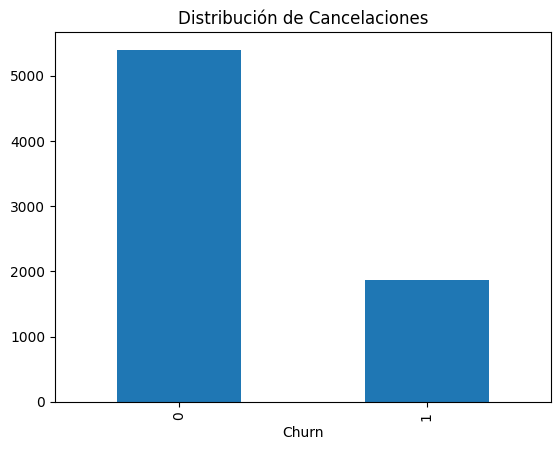

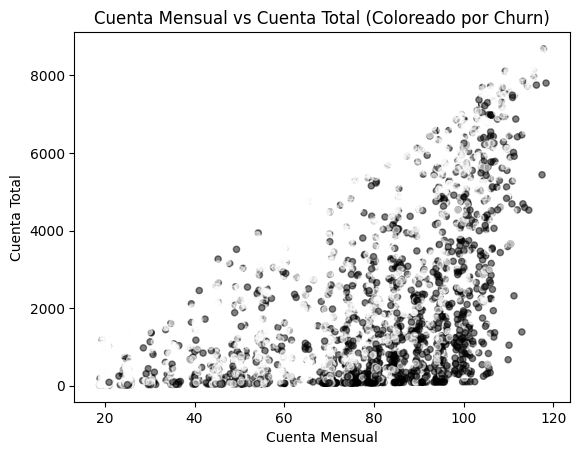

In [82]:
df['Churn'].value_counts().plot(kind='bar', title='Distribución de Cancelaciones')
plt.show()

df.plot(kind='scatter', x='Cuenta_Mensual', y='Cuenta_Total', alpha=0.5, c=df['Churn'])
plt.title('Cuenta Mensual vs Cuenta Total (Coloreado por Churn)')
plt.xlabel('Cuenta Mensual')
plt.ylabel('Cuenta Total')
plt.show()

✅ Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

✅ Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

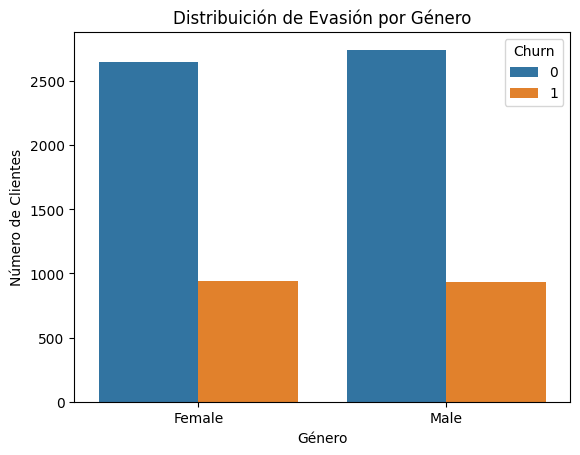


Distribuición de Evasión por Género:
Churn          0         1
gender                    
Female  0.738586  0.261414
Male    0.746939  0.253061


In [85]:
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Distribuición de Evasión por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

churn_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print("\nDistribuición de Evasión por Género:")
print(churn_by_gender)

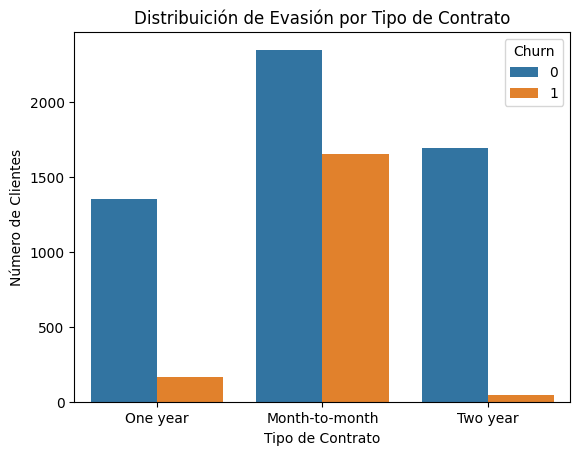


Distribuición de Evasión por Tipo de Contrato:
Churn                  0         1
Contract                          
Month-to-month  0.586767  0.413233
One year        0.890718  0.109282
Two year        0.972461  0.027539


In [86]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Distribuición de Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print("\nDistribuición de Evasión por Tipo de Contrato:")
print(churn_by_contract)

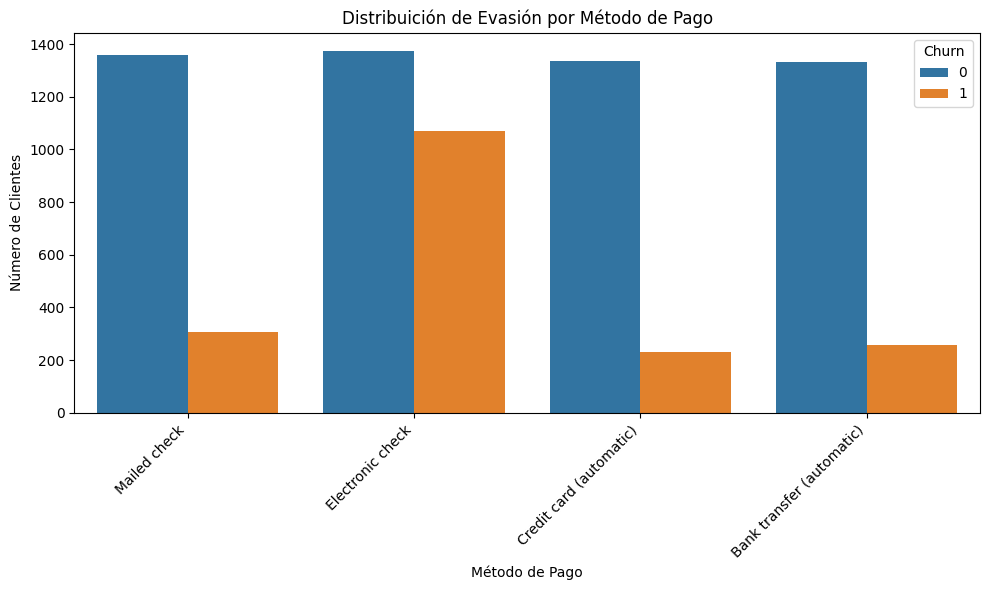


Distribuición de Evasión por Método de Pago:
Churn                             0         1
PaymentMethod                                
Bank transfer (automatic)  0.837634  0.162366
Credit card (automatic)    0.852041  0.147959
Electronic check           0.561963  0.438037
Mailed check               0.815015  0.184985


In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Distribuición de Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

churn_by_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print("\nDistribuición de Evasión por Método de Pago:")
print(churn_by_payment)

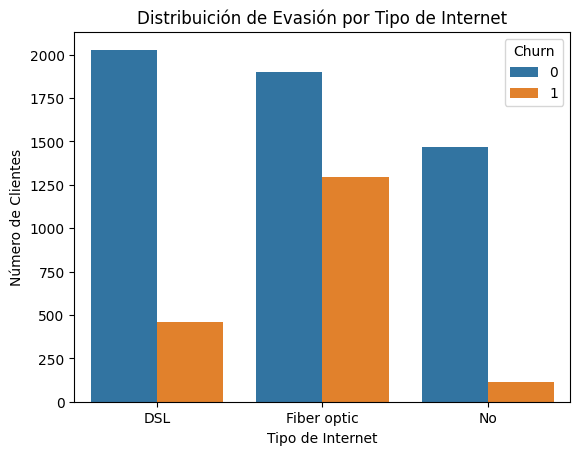


Distribuición de Evasión por Tipo de Internet:
Churn                   0         1
InternetService                    
DSL              0.815514  0.184486
Fiber optic      0.594434  0.405566
No               0.928526  0.071474


In [90]:
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Distribuición de Evasión por Tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Número de Clientes')
plt.show()

churn_by_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
print("\nDistribuición de Evasión por Tipo de Internet:")
print(churn_by_internet)

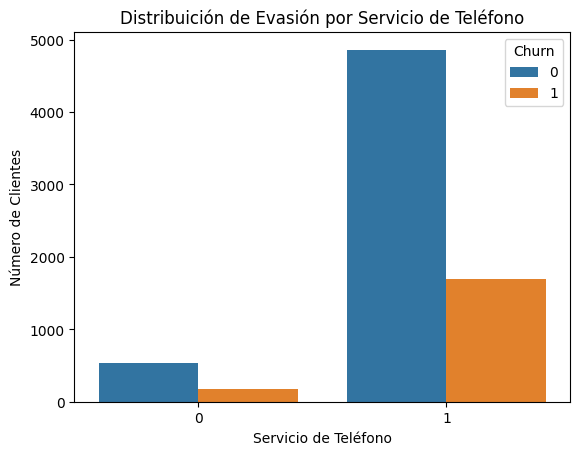


Distribuición de Evasión por Servicio de Teléfono
Churn                0         1
PhoneService                    
0             0.759547  0.240453
1             0.741006  0.258994


In [91]:
sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.title('Distribuición de Evasión por Servicio de Teléfono')
plt.xlabel('Servicio de Teléfono')
plt.ylabel('Número de Clientes')
plt.show()

churn_by_phone = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack()
print("\nDistribuición de Evasión por Servicio de Teléfono")
print(churn_by_phone)

✅ En este paso, exploramos cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

✅ Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

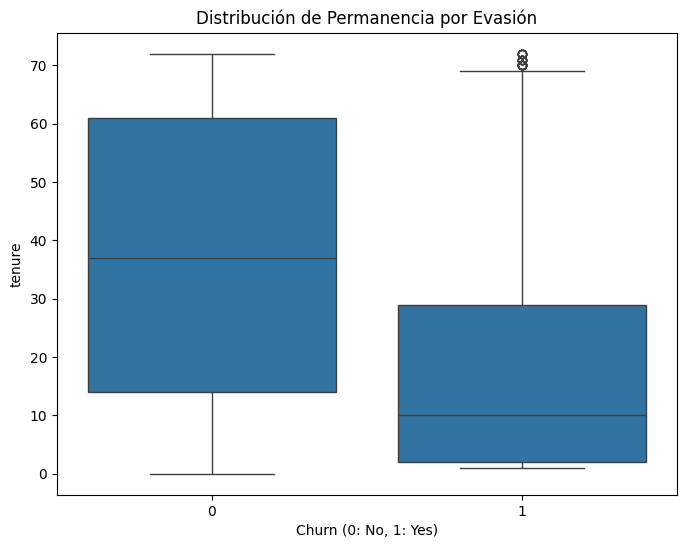

In [98]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title(f'Distribución de Permanencia por Evasión')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('tenure')
plt.show()

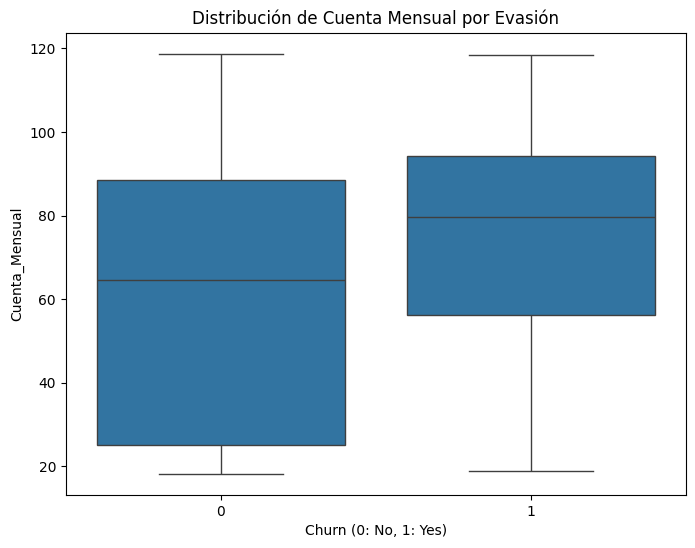

In [97]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Cuenta_Mensual')
plt.title(f'Distribución de Cuenta Mensual por Evasión')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Cuenta_Mensual')
plt.show()

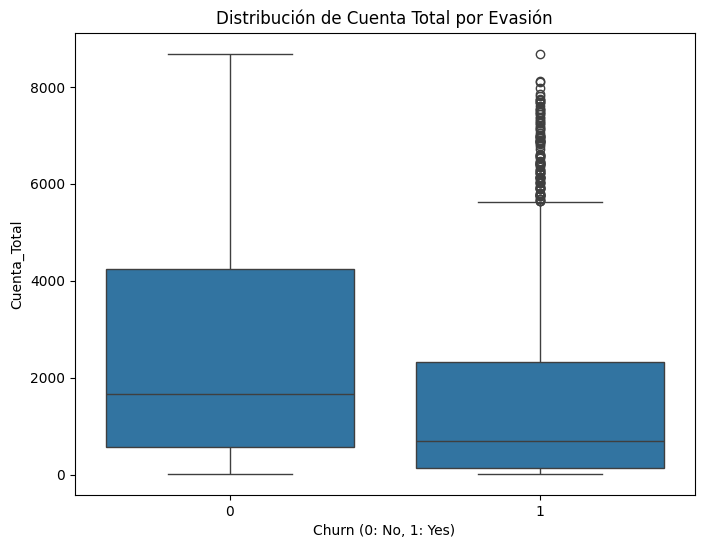

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='Cuenta_Total')
plt.title(f'Distribución de Cuenta Total por Evasión')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Cuenta_Total')
plt.show()

#📄Informe final

## Informe Final: Análisis Exploratorio de Datos de Evasión de Clientes

### 🔹 Introducción
Este informe presenta un análisis exploratorio de datos (EDA) sobre la evasión de clientes (Churn) en TelecomX. El objetivo principal es identificar los factores clave que influyen en la decisión de los clientes de cancelar sus servicios. Comprender estos patrones de comportamiento es crucial para desarrollar estrategias de retención efectivas y reducir la tasa de churn, lo que a su vez impacta positivamente en los ingresos y la sostenibilidad del negocio.

### 🔹 Limpieza y Tratamiento de Datos
Se realizaron los siguientes pasos de limpieza y transformación para preparar los datos para el análisis:
- **Carga de Datos:** Los datos fueron cargados desde un archivo JSON disponible a través de una URL.
- **Conversión a DataFrame:** Los datos fueron convertidos a un DataFrame de pandas para facilitar su manipulación y análisis.
- **Exploración Inicial:** Se examinaron las dimensiones del DataFrame (`df.shape`), los nombres de las columnas (`df.columns`), los tipos de datos (`df.info()`, `df.dtypes`) y se visualizaron las primeras filas (`df.head()`).
- **Eliminación de Columna Irrelevant:** La columna `customerID` fue eliminada ya que no era necesaria para el análisis de evasión.
- **Manejo de Inconsistencias en 'Churn':** Se identificaron y manejaron los valores inconsistentes en la columna `Churn`, mapeando 'Yes' a 1, 'No' a 0, y los valores vacíos a 0. Finalmente, la columna fue convertida a tipo entero.
- **Normalización de Columnas Anidadas:** Las columnas `customer`, `phone`, `internet`, y `account`, que contenían estructuras anidadas (diccionarios), fueron normalizadas utilizando `pd.json_normalize()` para extraer sus contenidos en columnas separadas en el DataFrame principal.
- **Manejo y Conversión de 'Charges_Total':** Se identificaron valores inconsistentes (' ') en la columna `Charges_Total`, se reemplazaron por `np.nan` y la columna fue convertida a tipo numérico (`float64`).
- **Creación de 'Cuentas_Diarias':** Se calculó la columna `Cuentas_Diarias` dividiendo `Cuenta_Mensual` por 30 para obtener una medida diaria del gasto del cliente.
- **Mapeo de Variables Categóricas Binarias:** Columnas como 'PhoneService', 'PaperlessBilling', 'Partner', y 'Dependents' fueron mapeadas a valores numéricos (1 para 'Yes', 0 para 'No').
- **Mapeo de Variables Categóricas con 'No Service':** Columnas como 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', y 'StreamingMovies' fueron mapeadas a valores numéricos (1 para 'Yes', 0 para 'No' y 0 para 'No phone service'/'No internet service').
- **Renombrado de Columnas:** Las columnas `Charges_Monthly` y `Charges_Total` fueron renombradas a `Cuenta_Mensual` y `Cuenta_Total` respectivamente para mayor claridad.
- **Mapeo de 'gender':** La columna `gender` fue mapeada a valores numéricos (1 para 'Male', 0 para 'Female').

### 🔹 Análisis Exploratorio de Datos

Se realizaron diversos análisis y visualizaciones para comprender la distribución de la evasión y su relación con otras variables:
- **Distribución de Evasión:** Un gráfico de barras (`cell_id: Y7iSbWy5u8x-`) mostró que aproximadamente el 25.7% de los clientes en el dataset han evadido.
- **Relación entre Cargos Mensuales y Totales:** Un gráfico de dispersión (`cell_id: Y7iSbWy5u8x-`) de `Cuenta_Mensual` vs `Cuenta_Total` coloreado por `Churn` visualizó la relación positiva entre estos cargos.
- **Matriz de Correlación:** Un heatmap (`cell_id: 9a9316b2`) de la matriz de correlación de variables numéricas reveló las relaciones entre estas variables. Se observó una fuerte correlación positiva entre `tenure` y `Cuenta_Total`, mientras que la correlación entre `Churn` y las variables numéricas fue relativamente baja, destacando una correlación negativa notable con `tenure`.
- **Distribución de Evasión por Variables Categóricas:**
    - **Género:** Gráficos de barras (`cell_id: a30ae5a4`) mostraron que la tasa de evasión fue similar entre hombres y mujeres.
    - **Tipo de Contrato:** El análisis (`cell_id: f6123432`) reveló que los clientes con contratos mes a mes tienen una tasa de evasión significativamente más alta en comparación con contratos de mayor duración.
    - **Método de Pago:** Gráficos de barras (`cell_id: 86a03030`) indicaron que los clientes que utilizan el pago electrónico presentan una tasa de evasión considerablemente mayor.
    - **Servicio de Internet:** El análisis (`cell_id: EvCZ6BB5xZG4`) mostró que los clientes con servicio de internet de fibra óptica tienen una tasa de evasión más alta que aquellos con DSL o sin servicio de internet.
    - **Servicio de Teléfono:** La tasa de evasión fue similar para clientes con y sin servicio de teléfono (`cell_id: VIFAL03mxZgl`).
- **Distribución de Variables Numéricas por Evasión:** Box plots (`cell_id: 557bf661`, `cell_id: GVLLhL2l9rAC`, `cell_id: DLSjmmAH9sXn`) compararon las distribuciones de `tenure`, `Cuenta_Mensual`, y `Cuenta_Total` para clientes que evadieron y no evadieron, mostrando que los clientes que evaden tienden a tener menor antigüedad y menores cargos.

### 🔹 Conclusiones e Insights

Los hallazgos clave de este análisis exploratorio son:
- **Factores de Mayor Impacto:** El tipo de contrato, el método de pago y el tipo de servicio de internet son los factores categóricos que parecen estar más fuertemente asociados con la evasión de clientes.
- **Clientes de Alto Riesgo:** Los clientes con contratos mes a mes, que utilizan el pago electrónico, y aquellos con servicio de internet de fibra óptica muestran una mayor propensión a evadir.
- **Importancia de la Antigüedad y Cargos:** Los clientes con menor antigüedad en la empresa y con cargos mensuales y totales más bajos tienen una mayor tendencia a cancelar sus servicios.

Estos insights sugieren que la evasión no es uniforme en toda la base de clientes, sino que se concentra en segmentos específicos con características de servicio y facturación particulares.

### 🔹 Próximos Pasos
Continuar con la preparación de los datos para el modelado, incluyendo la codificación de las variables categóricas restantes y el escalado de las variables numéricas.
Construir y evaluar modelos de clasificación para predecir la evasión de clientes.
Identificar las variables más importantes para la predicción de evasión utilizando técnicas de selección de características.
Desarrollar un plan de acción basado en los hallazgos del modelo para reducir la tasa de evasión de clientes.

### 🔹 Recomendaciones

Basado en este análisis inicial, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:
- **Programas de Retención Dirigidos:** Implementar programas de retención específicos para clientes con contratos mes a mes, ofreciendo incentivos para cambiar a contratos de mayor duración.
- **Alternativas de Pago:** Promover métodos de pago alternativos al cheque electrónico o investigar las razones por las cuales los clientes que utilizan este método tienen una alta tasa de evasión para abordar las causas raíz.
- **Mejorar la Experiencia del Cliente con Fibra Óptica:** Investigar las razones detrás de la alta tasa de evasión entre los usuarios de fibra óptica. Podría estar relacionado con la calidad del servicio, el precio o la atención al cliente. Implementar mejoras específicas para este segmento.
- **Estrategias para Clientes de Baja Antigüedad y Bajos Cargos:** Desarrollar estrategias para fidelizar a los clientes desde las primeras etapas de su relación con la empresa, ofreciendo soporte adicional o paquetes de servicios atractivos.

Este análisis exploratorio proporciona una base sólida para comprender el problema de la evasión. Los próximos pasos podrían incluir la construcción de un modelo predictivo de churn para identificar clientes en riesgo de manera proactiva y la implementación de las recomendaciones estratégicas para medir su impacto en la tasa de retención.